In [1]:
# import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import timeit
import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime

%matplotlib inline

In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

def iterating_over_degree(x, y, MAXdeg): 

    x_train, x_hold, y_train, y_hold = train_test_split(x, y, test_size=(0.2/0.7), random_state=34 ) #0.2/0.7 because we divided the set already in 70% train+holdout earlier

    err_train = []
    err_hold = []

    for deg in range(MAXdeg):
        # create poly features
        Poly = PolynomialFeatures(degree = deg)
        X_train_poly = Poly.fit_transform(x_train)
        X_hold_poly = Poly.fit_transform(x_hold)

        # fit model
        model_L2 = Ridge(alpha = 0, normalize = True, solver = 'lsqr') # select least squares regression as solver
        model_L2.fit(X_train_poly, y_train)
        #prediction = model_L2.predict(X_hold_poly)

        # compute errors
        err_train.append(mean_squared_error(model_L2.predict(X_train_poly), y_train))
        err_hold.append(mean_squared_error(model_L2.predict(X_hold_poly), y_hold))

    plt.figure(figsize = (8,5))    
    plt.semilogy(range(MAXdeg), err_train, range(MAXdeg), err_hold)
    plt.legend(["Training", "Holdour"])
    plt.xlabel("Polynomial degree")
    plt.ylabel("Mean squared error")
    plt.show()

In [99]:
#def iterating_over_lambda (x, y, deg, MAXlambda):
def iterating_over_lambda (x, y, deg, MINlambda, MAXlambda):


    err_train = []
    err_hold = []
    
    x_train, x_hold, y_train, y_hold = train_test_split(x, y, test_size=(0.2/0.7), random_state=34 ) #0.2/0.7 because we divided the set already in 70% train+holdout earlier

    for lam in np.logspace(MINlambda,MAXlambda,100):
        
        Poly = PolynomialFeatures(degree = deg)
        X_train_poly = Poly.fit_transform(x_train.reshape(-1,1))
        X_hold_poly = Poly.fit_transform(x_hold.reshape(-1,1))

        # fit model
        model_L2 = Ridge(alpha = lam, normalize = True, solver = 'lsqr') # select least squares regression as solver
        model_L2.fit(X_train_poly, y_train)
        #prediction = model_L2.predict(X_hold_poly)

        # compute errors
        err_train.append(mean_squared_error(model_L2.predict(X_train_poly), y_train))
        err_hold.append(mean_squared_error(model_L2.predict(X_hold_poly), y_hold))

    plt.figure(figsize = (8,5))
    plt.loglog(np.logspace(MINlambda,MAXlambda,100), err_train, np.logspace(MINlambda,MAXlambda,100), err_hold)
    plt.legend(["Training", "Holdout"])
    plt.xlabel("$\lambda$ (or alpha in scikit learn terms)")
    plt.ylabel("Mean squared error")
    plt.show()

In [100]:
def plot_regression_poly_scikit(x,y,deg, lam, Name):
    
    Poly = PolynomialFeatures(degree = deg)
    X_poly = Poly.fit_transform(x)
    #X_poly = Poly.fit_transform(x.reshape(-1,1))

    model_L2 = Ridge(alpha = lam, normalize = True, solver = 'lsqr') # select least squares regression as solver
    model_L2.fit(X_poly, y)
    prediction = model_L2.predict(X_poly)
    
    # Plotting the regression line and the data (we have to transform the inputs as well!)
    x_fit = np.arange(x.min(),x.max() ,1)[:, np.newaxis]
    y_pred = model_L2.predict(Poly.fit_transform(x_fit.reshape(-1,1)))
    
    plt.figure(figsize = (8,5))
    plt.scatter(x,y,marker="x", c='C2')
    ylim = plt.ylim()
    plt.plot(x_fit,y_pred, c='C1')
    plt.xlabel(Name)
    plt.ylabel("Demand")
    plt.xlim([x.min()-2,x.max()+2]) # leave some space before and after limits
    plt.ylim(ylim)
    print ('R2: ',r2_score(y, prediction))
    #print(lin_reg_Poly.coef_)

In [101]:
marburg = pd.read_pickle("../0_data/marburg_clean.pkl")
duisburg = pd.read_pickle('../0_data/duisburg_clean.pkl')
marburg_weather = pd.read_pickle("../0_data/weather/marburg_weather.pkl")
duisburg_weather = pd.read_pickle("../0_data/weather/duisburg_weather.pkl")
marburg_weather["h"]= marburg_weather.index
marburg_weather

,temperature,precipitation,h
timestamp,,,
2019-01-20 00:00:00,-7.9,0.0,2019-01-20 00:00:00
2019-01-20 01:00:00,-8.3,0.0,2019-01-20 01:00:00
2019-01-20 02:00:00,-8.7,0.0,2019-01-20 02:00:00
2019-01-20 03:00:00,-8.9,0.0,2019-01-20 03:00:00
2019-01-20 04:00:00,-8.7,0.0,2019-01-20 04:00:00
...,...,...,...
2020-01-20 19:00:00,-1.5,0.0,2020-01-20 19:00:00
2020-01-20 20:00:00,-1.7,0.0,2020-01-20 20:00:00
2020-01-20 21:00:00,-2.3,0.0,2020-01-20 21:00:00


## Marburg

In [102]:
ma = pd.DataFrame(marburg.resample('H').count()["day"])
ma.rename(columns={'day': 'demand'}, inplace=True)

ma['dayofyear'] = ma.index.map(lambda datetime : datetime.dayofyear)
ma['week'] = ma.index.map(lambda datetime : datetime.week)
ma['weekday'] = ma.index.map(lambda datetime : datetime.weekday)
ma['is_weekday'] = ma['weekday'].map(lambda day : day < 5)
ma['hour'] = ma.index.map(lambda datetime : datetime.hour)

ma = ma.merge(marburg_weather, left_index=True, right_index=True)

#X = ma[['temperature', 'hour', 'precipitation', 'dayofyear']]

## Temperature

In [119]:
X = ma[['temperature']]
y = ma['demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=34 )

The exact solution is  x = 0                              


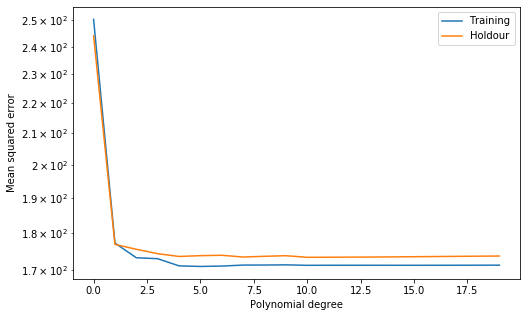

In [120]:
iterating_over_degree(X_train,y_train,20)

The exact solution is  x = 0                              


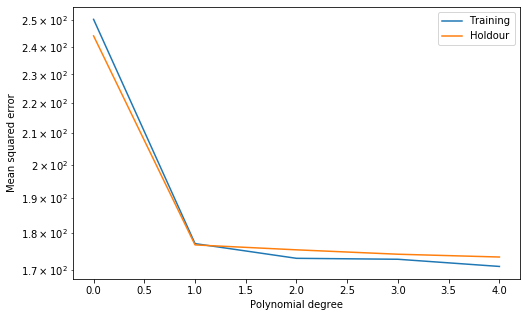

In [121]:
iterating_over_degree(X_train,y_train,5)

R2:  0.30107271102543043


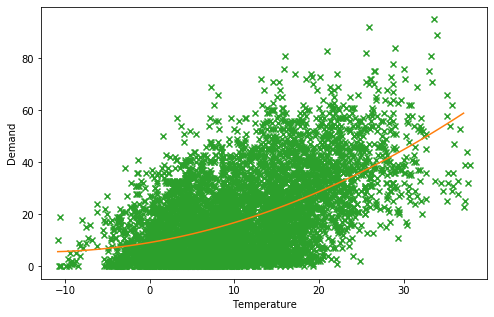

In [129]:
plot_regression_poly_scikit(X_train.values, y_train.values, 2, 0, "Temperature")

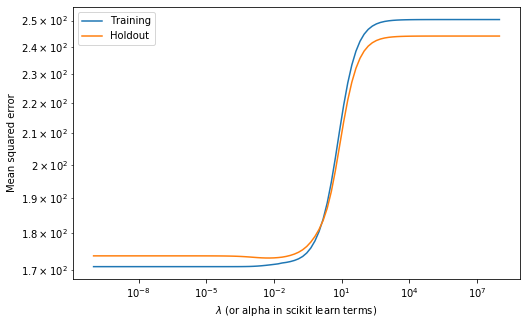

In [123]:
iterating_over_lambda(X_train.values,y_train.values,5,-10, 8)

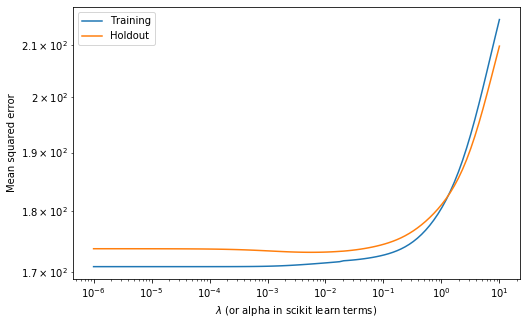

In [124]:
iterating_over_lambda(X_train.values,y_train.values,5,-6, 1)

R2:  0.30033353387432415


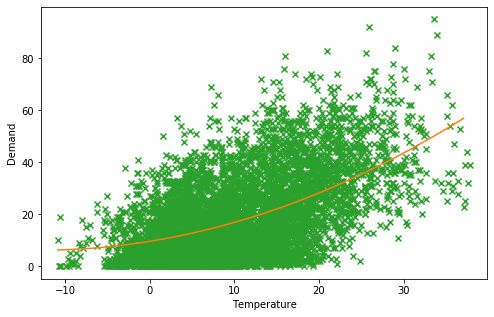

In [131]:
plot_regression_poly_scikit(X_train.values, y_train.values, 2, 0.1, "Temperature")

## Precipitation

In [142]:
X = ma[['precipitation']]
y = ma['demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=34 )

The exact solution is  x = 0                              


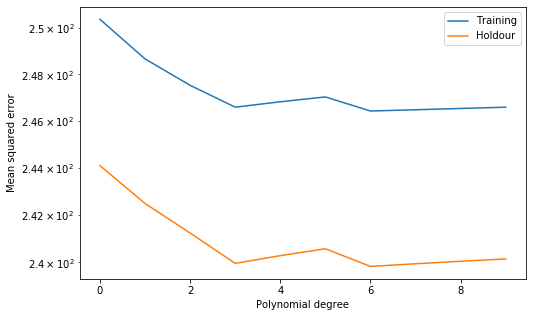

In [145]:
iterating_over_degree(X_train,y_train,10)

R2:  0.016342195535600457


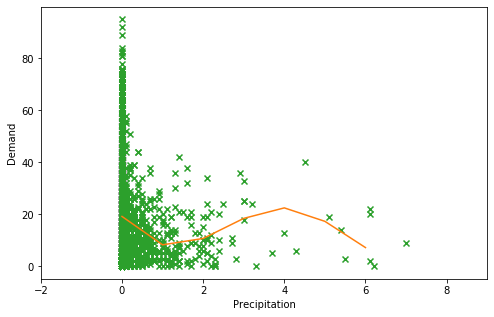

In [148]:
plot_regression_poly_scikit(X_train.values, y_train.values, 6, 0, "Precipitation")

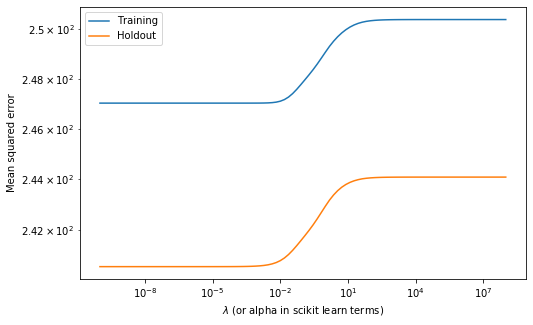

In [151]:
iterating_over_lambda(X_train.values,y_train.values,5,-10, 8)

R2:  0.01348821248885057


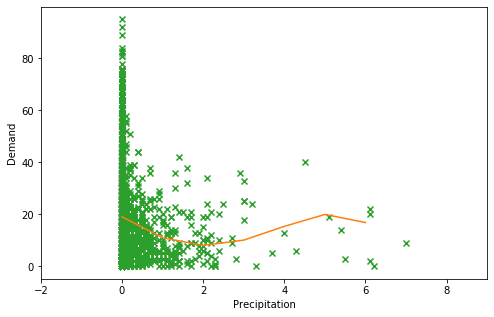

In [152]:
plot_regression_poly_scikit(X_train.values, y_train.values, 5, 0.01, "Precipitation")

## Hour

In [132]:
X = ma[['hour']]
y = ma['demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=34 )

The exact solution is  x = 0                              


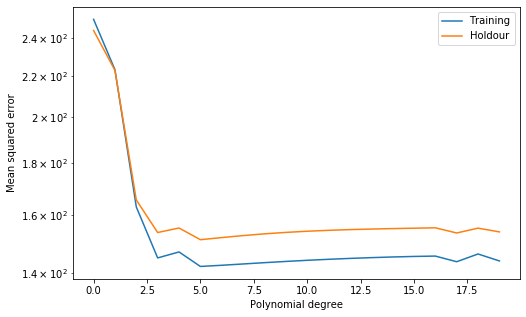

In [133]:
iterating_over_degree(X_train,y_train,20)

R2:  0.4184506856610869


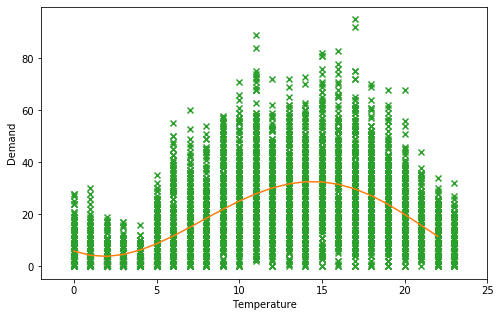

In [135]:
plot_regression_poly_scikit(X_train.values, y_train.values, 5, 0, "Hour")

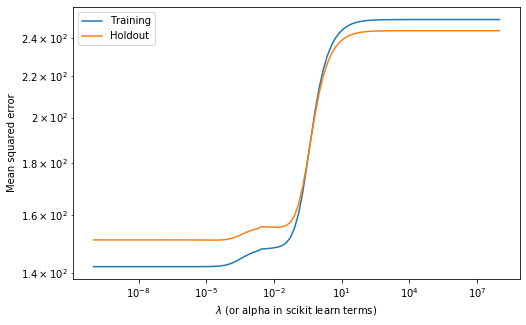

In [136]:
iterating_over_lambda(X_train.values,y_train.values,5,-10, 8)

R2:  0.41552354462344


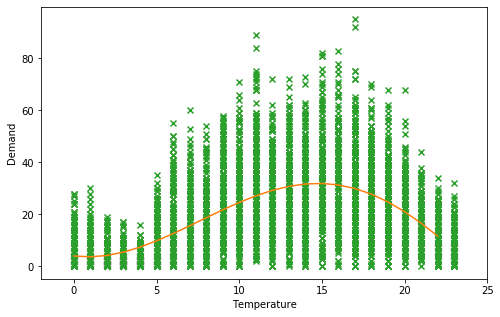

In [141]:
plot_regression_poly_scikit(X_train.values, y_train.values, 5, 0.0001, "Hour")

## Day of year

In [153]:
X = ma[['dayofyear']]
y = ma['demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=34 )

The exact solution is  x = 0                              


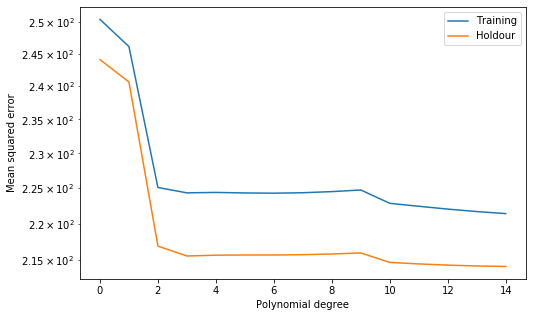

In [155]:
iterating_over_degree(X_train,y_train,15)

R2:  0.11311555776922111


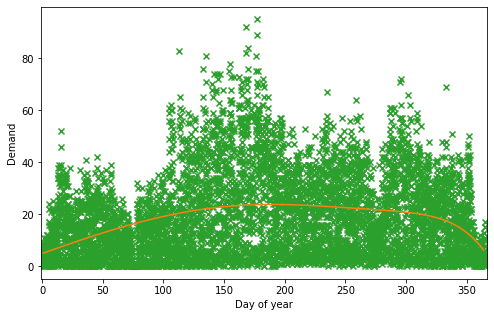

In [161]:
plot_regression_poly_scikit(X_train.values, y_train.values, 10, 0, "Day of year")

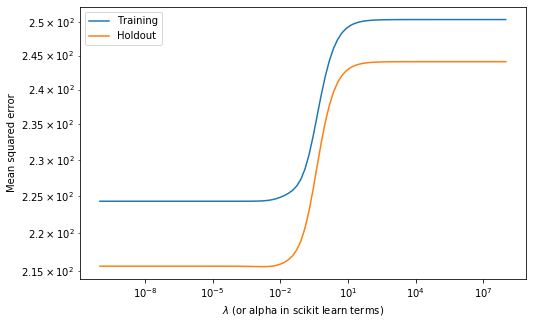

In [163]:
iterating_over_lambda(X_train.values,y_train.values,5,-10, 8)

R2:  0.1058131946242582


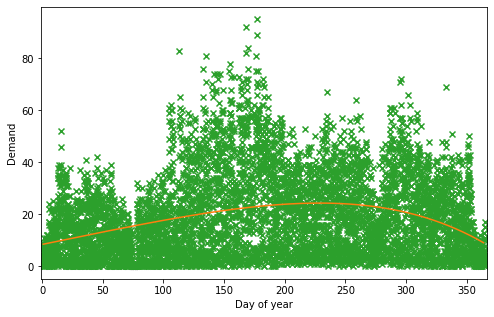

In [164]:
plot_regression_poly_scikit(X_train.values, y_train.values, 5, 0.01, "Day of year")

## Duisburg

In [165]:
du = pd.DataFrame(duisburg.resample('H').count()["day"])
du.rename(columns={'day': 'demand'}, inplace=True)

du['dayofyear'] = du.index.map(lambda datetime : datetime.dayofyear)
du['week'] = du.index.map(lambda datetime : datetime.week)
du['weekday'] = du.index.map(lambda datetime : datetime.weekday)
du['is_weekday'] = du['weekday'].map(lambda day : day < 5)
du['hour'] = du.index.map(lambda datetime : datetime.hour)

du = du.merge(duisburg_weather, left_index=True, right_index=True)

#X = ma[['temperature', 'hour', 'precipitation', 'dayofyear']]

## Temperature

In [166]:
X = du[['temperature']]
y = du['demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=34 )

The exact solution is  x = 0                              


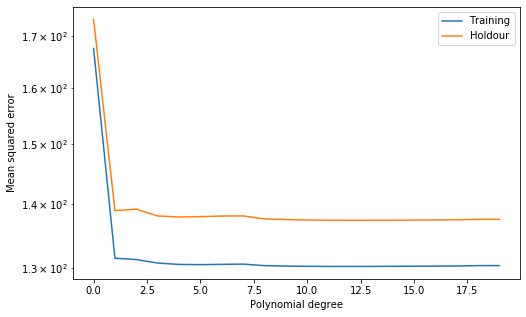

In [167]:
iterating_over_degree(X_train,y_train,20)

The exact solution is  x = 0                              


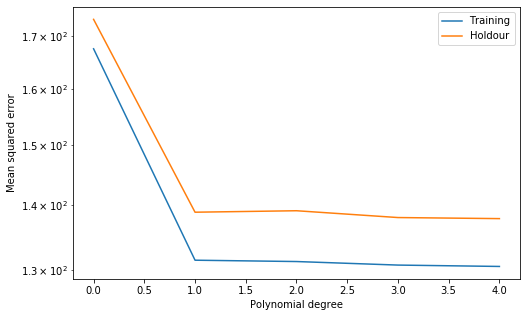

In [168]:
iterating_over_degree(X_train,y_train,5)

R2:  0.21027673768628552


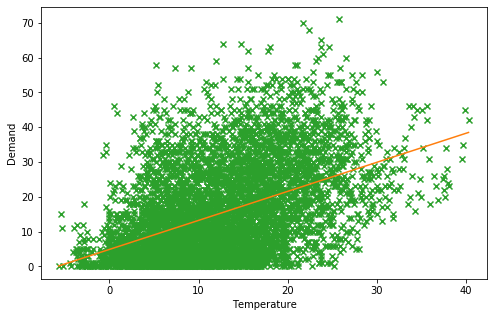

In [169]:
plot_regression_poly_scikit(X_train.values, y_train.values, 1, 0, "Temperature")

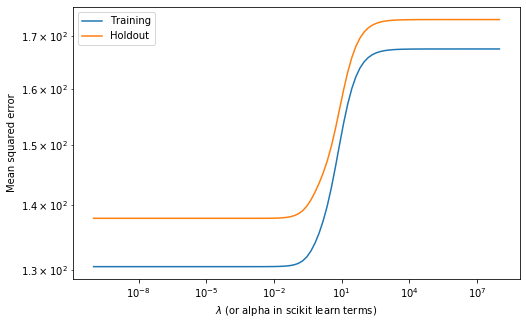

In [170]:
iterating_over_lambda(X_train.values,y_train.values,5,-10, 8)

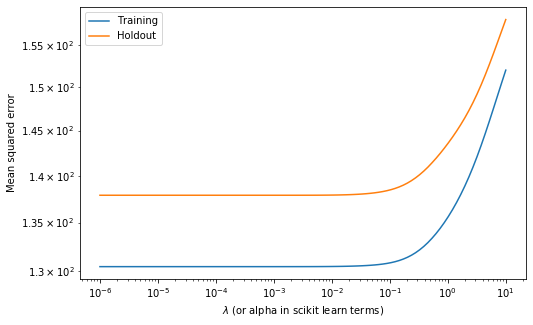

In [171]:
iterating_over_lambda(X_train.values,y_train.values,5,-6, 1)

R2:  0.20853891340788633


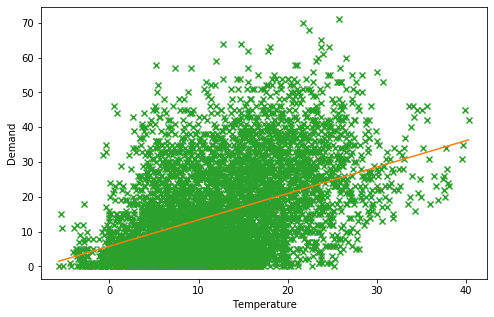

In [173]:
plot_regression_poly_scikit(X_train.values, y_train.values, 1, 0.1, "Temperature")

## Precipitation

In [174]:
X = du[['precipitation']]
y = du['demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=34 )

The exact solution is  x = 0                              


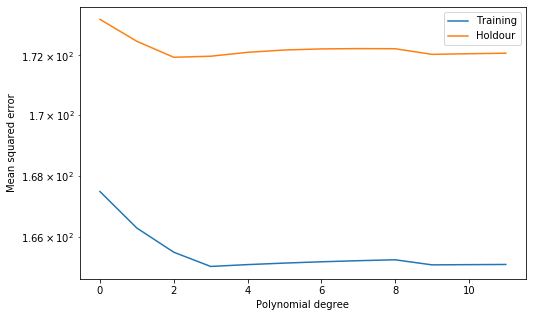

In [177]:
iterating_over_degree(X_train,y_train,12)

R2:  0.012247322417157314


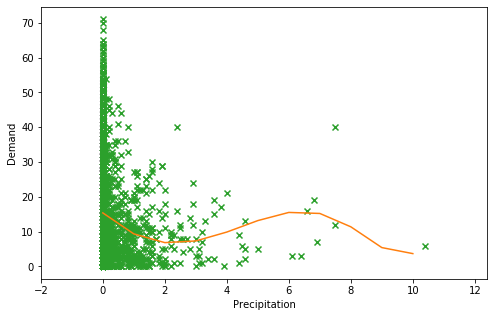

In [179]:
plot_regression_poly_scikit(X_train.values, y_train.values, 9, 0, "Precipitation")

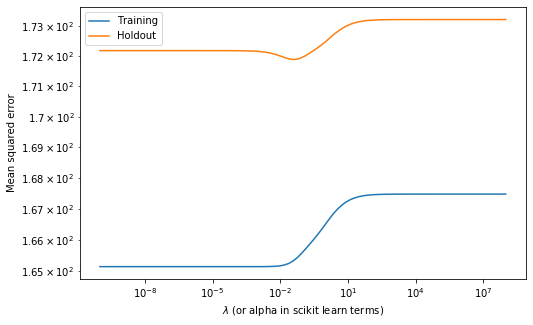

In [180]:
iterating_over_lambda(X_train.values,y_train.values,5,-10, 8)

R2:  0.01164034758240906


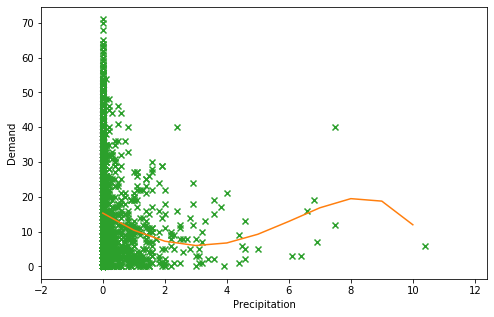

In [181]:
plot_regression_poly_scikit(X_train.values, y_train.values, 5, 0.01, "Precipitation")

## Hour

In [182]:
X = du[['hour']]
y = du['demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=34 )

The exact solution is  x = 0                              


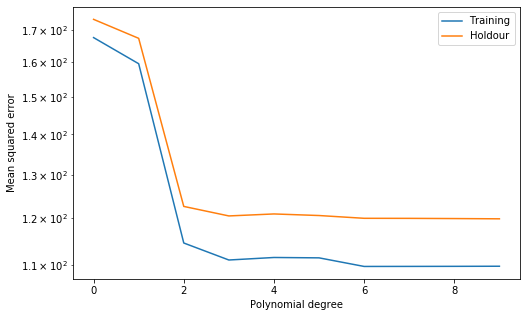

In [184]:
iterating_over_degree(X_train,y_train,10)

R2:  0.32793280610152


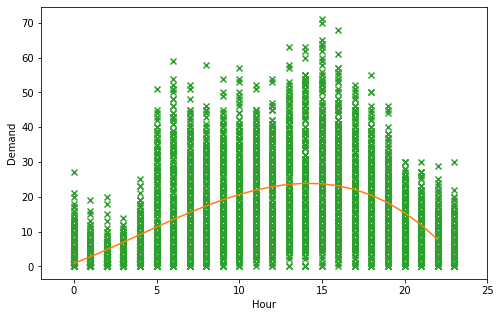

In [188]:
plot_regression_poly_scikit(X_train.values, y_train.values, 3, 0, "Hour")

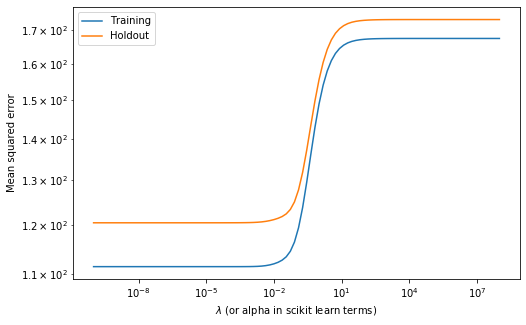

In [189]:
iterating_over_lambda(X_train.values,y_train.values,5,-10, 8)

R2:  0.32231518844424156


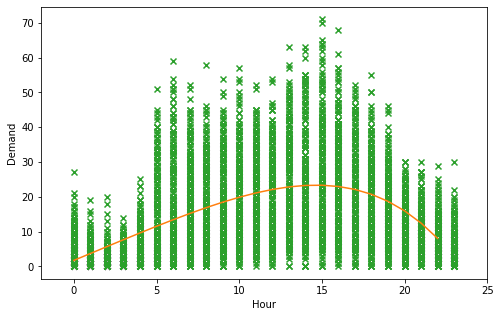

In [190]:
plot_regression_poly_scikit(X_train.values, y_train.values, 5, 0.01, "Hour")

## Day of year

In [191]:
X = du[['dayofyear']]
y = du['demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=34 )

The exact solution is  x = 0                              


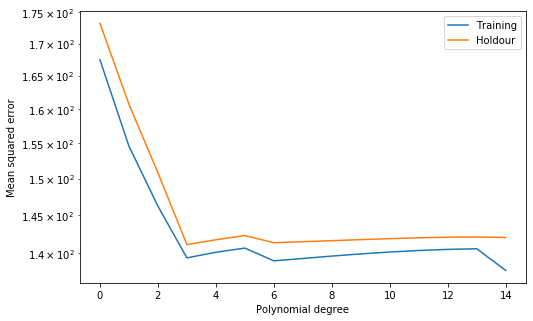

In [192]:
iterating_over_degree(X_train,y_train,15)

R2:  0.17321302409905803


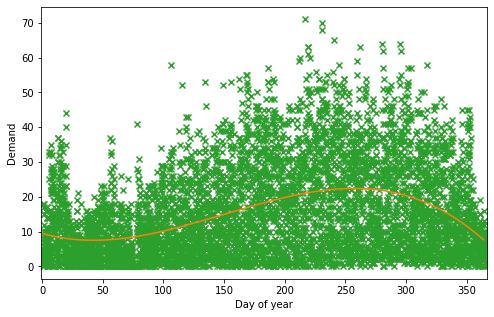

In [195]:
plot_regression_poly_scikit(X_train.values, y_train.values, 3, 0, "Day of year")

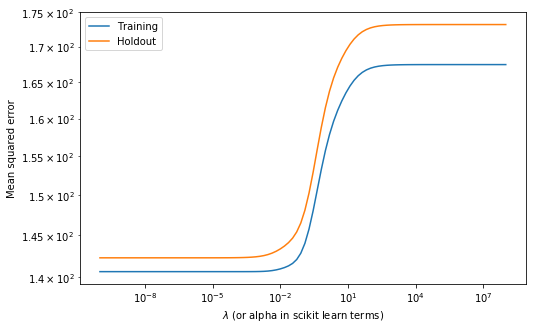

In [196]:
iterating_over_lambda(X_train.values,y_train.values,5,-10, 8)

R2:  0.1632987768994677


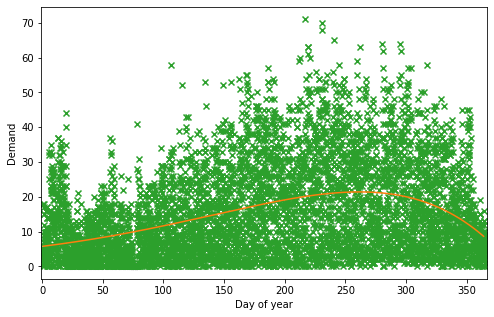

In [199]:
plot_regression_poly_scikit(X_train.values, y_train.values, 5, 0.01, "Day of year")